<a href="https://colab.research.google.com/github/Skystar728/pdm12/blob/main/py-tensorflow/DL1-FCN/mnist05_FCN_test_ALL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DNN (Deep Neural Networks) 구현 방법
> - Sequential model
> - Functional model
> - Subclassing model

# **Test of mnist FCN model**
## Sequential model
- FCN2
- FCN3
- FCN4
- FCN5

***

![mnist_NN_2_layers](https://raw.githubusercontent.com/Redwoods/Py/master/pdm2020/my-note/py-tensorflow/images/mnist_NN_2_layers.png)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

print(tf.__version__)

2.6.0


## **데이터 로딩, 정규화**

In [ ]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test.shape))

X_train=(60000, 28, 28)
y_train=(60000,)
X_test=(10000, 28, 28)
y_test=(10000,)


In [ ]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## **FCN2**

In [ ]:
# Set random number seed here!
np.random.seed(1234)
tf.random.set_seed(1234)

fcn2 = keras.models.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

fcn2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
fcn2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
fcn2.fit(X_train, y_train, 
         epochs = 20,  
         batch_size = 100,
         validation_data=(X_test, y_test))

Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.3881 - accuracy: 0.8886 - val_loss: 0.1856 - val_accuracy: 0.9446
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1894 - accuracy: 0.9452 - val_loss: 0.1276 - val_accuracy: 0.9617
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1440 - accuracy: 0.9578 - val_loss: 0.1048 - val_accuracy: 0.9686
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1186 - accuracy: 0.9654 - val_loss: 0.0901 - val_accuracy: 0.9731
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1022 - accuracy: 0.9696 - val_loss: 0.0837 - val_accuracy: 0.9745
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0906 - accuracy: 0.9727 - val_loss: 0.0779 - val_accuracy: 0.9755
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0817 - accuracy: 0.9750 - val_loss: 0.0792 - val_accuracy: 0.9754
Epoch 

In [ ]:
fcn2.evaluate(X_test, y_test, batch_size =100)

100/100 [==============================] - 0s 2ms/step - loss: 0.0685 - accuracy: 0.9811


[0.06845840066671371, 0.9811000227928162]

## **FCN3**

In [ ]:
# Set random number seed here!
np.random.seed(1234)
tf.random.set_seed(1234)

fcn3 = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # 벡터로 바꿔줌
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

fcn3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
fcn3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
________________________________________________

In [ ]:
fcn3.fit(X_train,y_train, epochs= 20 , batch_size =100,
         validation_data=(X_test, y_test))

Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 0.3509 - accuracy: 0.8951 - val_loss: 0.1301 - val_accuracy: 0.9599
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1500 - accuracy: 0.9555 - val_loss: 0.0962 - val_accuracy: 0.9702
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1109 - accuracy: 0.9673 - val_loss: 0.0788 - val_accuracy: 0.9747
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0886 - accuracy: 0.9732 - val_loss: 0.0736 - val_accuracy: 0.9765
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0753 - accuracy: 0.9767 - val_loss: 0.0707 - val_accuracy: 0.9769
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0685 - accuracy: 0.9780 - val_loss: 0.0626 - val_accuracy: 0.9815
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0589 - accuracy: 0.9808 - val_loss: 0.0670 - val_accuracy: 0.9784
Epoch 

In [ ]:
fcn3.evaluate(X_test, y_test, batch_size= 100)

100/100 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9833


[0.0653071254491806, 0.983299970626831]

## **FCN4**

In [ ]:
# Set random number seed here!
np.random.seed(1234)
tf.random.set_seed(1234)

fcn4 = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

fcn4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
fcn4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)               

In [ ]:
fcn4.fit(X_train, y_train, epochs = 20 , batch_size =100,
         validation_data=(X_test, y_test))

Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 0.4134 - accuracy: 0.8761 - val_loss: 0.1422 - val_accuracy: 0.9570
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1767 - accuracy: 0.9508 - val_loss: 0.1048 - val_accuracy: 0.9669
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1311 - accuracy: 0.9620 - val_loss: 0.0934 - val_accuracy: 0.9709
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1115 - accuracy: 0.9679 - val_loss: 0.0771 - val_accuracy: 0.9760
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0945 - accuracy: 0.9725 - val_loss: 0.0800 - val_accuracy: 0.9771
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0819 - accuracy: 0.9763 - val_loss: 0.0686 - val_accuracy: 0.9793
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0725 - accuracy: 0.9788 - val_loss: 0.0696 - val_accuracy: 0.9800
Epoch 

In [ ]:
fcn4.evaluate(X_test, y_test, batch_size =100)

100/100 [==============================] - 0s 2ms/step - loss: 0.0737 - accuracy: 0.9817


[0.07373993843793869, 0.9817000031471252]

## **FCN5**

In [ ]:
# Set random number seed here!
np.random.seed(1234)
tf.random.set_seed(1234)

fcn5 = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

fcn5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
fcn5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)               

In [ ]:
fcn5.fit(X_train, y_train, epochs=20, batch_size =100,
         validation_data=(X_test, y_test))

Epoch 1/20
600/600 [==============================] - 3s 5ms/step - loss: 0.5933 - accuracy: 0.8191 - val_loss: 0.1700 - val_accuracy: 0.9510
Epoch 2/20
600/600 [==============================] - 3s 4ms/step - loss: 0.2305 - accuracy: 0.9403 - val_loss: 0.1199 - val_accuracy: 0.9667
Epoch 3/20
600/600 [==============================] - 3s 4ms/step - loss: 0.1792 - accuracy: 0.9550 - val_loss: 0.1059 - val_accuracy: 0.9716
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1474 - accuracy: 0.9620 - val_loss: 0.0970 - val_accuracy: 0.9730
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1289 - accuracy: 0.9672 - val_loss: 0.0918 - val_accuracy: 0.9749
Epoch 6/20
600/600 [==============================] - 3s 4ms/step - loss: 0.1081 - accuracy: 0.9724 - val_loss: 0.0845 - val_accuracy: 0.9773
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1038 - accuracy: 0.9729 - val_loss: 0.0773 - val_accuracy: 0.9807
Epoch 

In [ ]:
fcn5.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 2ms/step - loss: 0.0828 - accuracy: 0.9827


[0.0827791765332222, 0.982699990272522]

# **[DIY] Hidden layer에 따른 정확도**

In [ ]:
fcn2.evaluate(X_test, y_test, batch_size = 100)
fcn3.evaluate(X_test, y_test, batch_size = 100)
fcn4.evaluate(X_test, y_test, batch_size = 100)
fcn5.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 2ms/step - loss: 0.0828 - accuracy: 0.9827


[0.0827791765332222, 0.982699990272522]

In [ ]:
fcn_result = [[0.0685, 0.9811], 
 [0.0653, 0.9833], 
 [0.0737, 0.9817], 
 [0.0828, 0.9827]]

In [ ]:
# select accuracies
accuracy = [row[1] for row in fcn_result]
accuracy

[0.9811, 0.9833, 0.9817, 0.9827]

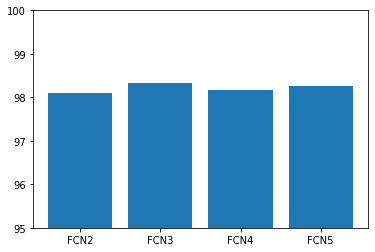

In [ ]:
x = np.arange(4)
fcns = ['FCN2','FCN3','FCN4','FCN5']
accuracies = [acc*100 for acc in accuracy] # %

plt.bar(x, accuracies)
plt.xticks(x, fcns)
plt.ylim((95,100))  # 주석 해제하면 그래프의 구분이 뚜렷해짐
plt.show()

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

In [ ]:
fcn3.save('fcn3_best.hdf5')

In [ ]:
from keras.models import load_model

model = load_model('fcn3_best.hdf5')
model.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9833


[0.0653071254491806, 0.983299970626831]

---